#### KNN (KNeighbor Classifier) on Iris Dataset

In [9]:
##Importing required libraries
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import re
import seaborn as sns
import numpy as np
import time

In [10]:
## Importing Iris Data Set
Full_data= load_iris()
#print(Full_data)

## Seperating data and target values from dataset
Main_data = Full_data['data']
Class = Full_data['target']

## Converting to dataframes and assigning column names
data_df= pd.DataFrame(Main_data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
class_df=pd.DataFrame(Class, columns=['Class'])

##Replacing Class values with actual category
setosa_df = class_df.replace(to_replace=[0], value='Setosa', regex=True)
versicolor_df = setosa_df.replace(to_replace=[1], value='versicolor', regex=True)
class_name_df = versicolor_df.replace(to_replace=[2], value='virginica', regex=True)
#print(class_name_df)

##Combining data Dataframe with class dataframe 
F1_df = pd.concat([data_df.reset_index(drop=True), class_df.reset_index(drop=True)], axis=1)        #Without class names
print('Iris DataFrame with Species Values:\n', F1_df)
print('--------------------------------------------------------------------------------------------')
F2_df = pd.concat([data_df.reset_index(drop=True), class_name_df.reset_index(drop=True)], axis=1)     #With class names
print('Iris DataFrame with Species Name:\n', F2_df)

##Using iloc
data_df= F1_df.iloc[:, :-1].values
class_df = F1_df.iloc[:, 4].values


Iris DataFrame with Species Values:
      sepal length  sepal width  petal length  petal width  Class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]
--------------------------------------------------------------------------------------------
Iris DataFrame with Species Name:
      sepal length  sepal width 

In [11]:
#Dividing the dataset into train (60%), validation (20%) and test set (20%).
full_train_data, full_test_data, full_train_class, full_test_class = train_test_split(data_df, class_df, test_size=0.2, random_state=42)
train_data, validation_data, train_class, validation_class = train_test_split(full_train_data, full_train_class, test_size=0.25, random_state=42)
print('-------------------------------------------------------------------------------------------------------')
print('Train Data Count: ', len(train_data))
print('Validation Data Count: ', len(validation_data))
print('Testing Data Count: ', len(full_test_data))
print('-------------------------------------------------------------------------------------------------------')

-------------------------------------------------------------------------------------------------------
Train Data Count:  90
Validation Data Count:  30
Testing Data Count:  30
-------------------------------------------------------------------------------------------------------


In [12]:
#Performing KNN Classification with default parameters
KNN_Classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
KNN_Classifier.fit(train_data, np.ravel(train_class))          #np.ravel()-->For Data conversion
test_prediction = KNN_Classifier.predict(full_test_data)

Accuracy = accuracy_score(full_test_class, test_prediction)*100
print('Accuracy of KNN Model with default parameters (n_neighbors =5): ', Accuracy, '%')

Accuracy of KNN Model with default parameters (n_neighbors =5):  96.66666666666667 %


In [13]:
##Creating KNeighbors Classifier for multiple K values(hyperparameter) and testing it on validation data.

Acc_list=[]                           #Accuracy List to hold accuracy of different values of K
k_values=[1,5,10,15,20,25,30,35]      #Given K values
Begin = time.time()                   #Timer
for i in range(len(k_values)):
    KNN_Classifier = KNeighborsClassifier(n_neighbors=k_values[i])
    KNN_Classifier.fit(train_data, train_class)        
    test_prediction = KNN_Classifier.predict(validation_data)
    ## Generate Accuracy Score
    Accuracy = accuracy_score(validation_class, test_prediction)*100
    print('Accuracy of KNN Model with k = %d: ' %k_values[i], Accuracy, '%')
    print('\n')
    end = time.time()
    t = end - Begin
    print('Time taken by K = %d: ' %k_values[i], t )
    Acc_list.append(Accuracy)
    print('-------------------------------------------------------------------------------------------------')

print('Accuracy List of all K values:\n', Acc_list)


Accuracy of KNN Model with k = 1:  90.0 %


Time taken by K = 1:  0.0029916763305664062
-------------------------------------------------------------------------------------------------
Accuracy of KNN Model with k = 5:  93.33333333333333 %


Time taken by K = 5:  0.005982398986816406
-------------------------------------------------------------------------------------------------
Accuracy of KNN Model with k = 10:  93.33333333333333 %


Time taken by K = 10:  0.008011102676391602
-------------------------------------------------------------------------------------------------
Accuracy of KNN Model with k = 15:  93.33333333333333 %


Time taken by K = 15:  0.010969400405883789
-------------------------------------------------------------------------------------------------
Accuracy of KNN Model with k = 20:  93.33333333333333 %


Time taken by K = 20:  0.012989997863769531
-------------------------------------------------------------------------------------------------
Accuracy of KNN 

Combined Accuracy and Parameter (K) Dataframe:
    K_Value   Accuracy
0        1  90.000000
1        5  93.333333
2       10  93.333333
3       15  93.333333
4       20  93.333333
5       25  96.666667
6       30  96.666667
7       35  93.333333


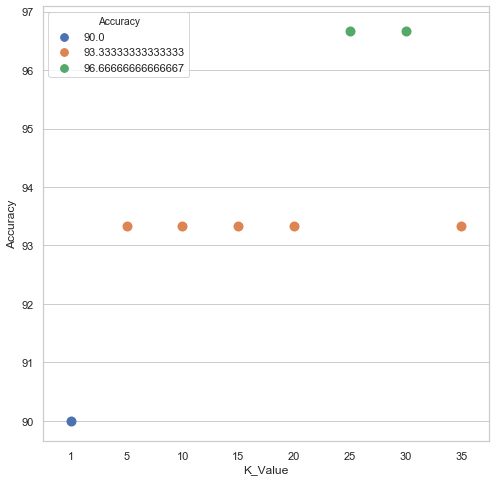

In [14]:
##Creating a dataframe to store Accuracy values corresponding to their K values
k_value_df = pd.DataFrame(k_values, columns=['K_Value'])
Acc_df = pd.DataFrame(Acc_list, columns=['Accuracy'])
k_Acc_df = pd.concat([k_value_df.reset_index(drop=True), Acc_df.reset_index(drop=True)], axis=1)
print('Combined Accuracy and Parameter (K) Dataframe:\n', k_Acc_df)

##Seaborn Plot
sns.set(style='whitegrid')
fig, axes = plt.subplots(figsize=(8,8))
sns.swarmplot('K_Value', 'Accuracy', data=k_Acc_df, hue='Accuracy', size=10)
plt.show()

On testing the KNeighbour classifier with Validation Data, there are 2 best found values of K(nearest neighbour)[K =25, 30] with maximum accuracy of 96.66 %.

In [15]:
##Testing the model with test data for 2 values of K.

K_value=[25,30]
Begin = time.time() 
for i in range(len(K_value)):
    KNN_Classifier = KNeighborsClassifier(n_neighbors=K_value[i])  #Default Parameters except n_neighbors
    KNN_Classifier.fit(train_data, np.ravel(train_class))          #np.ravel()-->For Data conversion
    test_prediction = KNN_Classifier.predict(full_test_data)       #Testing the model with test data
    
    cm = confusion_matrix(full_test_class, test_prediction)
    print('For K = ', K_value[i])
    print('\n')
    print('Confusion Matrix:\n', cm)
    print('\n')
    cr = classification_report(full_test_class, test_prediction, target_names=['setosa', 'versicolor', 'virginica'])
    print('Classification Report:\n', cr)
    print('\n')
    end = time.time()
    t = end - Begin
    print('Time taken by K = %d: ' %K_value[i], t )
    print('\n')
    Accuracy = accuracy_score(full_test_class, test_prediction)*100
    print('Accuracy of KNN Model:\n', Accuracy, '%')
    print('----------------------------------------------------------------------------------------------------------------------')


For K =  25


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Time taken by K = 25:  0.008011579513549805


Accuracy of KNN Model:
 100.0 %
----------------------------------------------------------------------------------------------------------------------
For K =  30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accura

### Following are the observations of KNeighbor Classifier on Iris Dataset:

#### Primary Opinion:
1) Both K =25 and K =30 (best found parameters) has perfect accuracy of 100% on testing data, sometimes classifier produces 100 percent accuracy for small dataset. In addition, both training and testing data are too much similar.

2) In order to pick one K value , I would select K = 25 because of the following reasons:

- Takes significantly less time than K = 30, so less computational complexity and high speed of convergence.
- In K = 30, there exists a case where for a particular data point if 15 nearest neighbor belong to class setosa and remaining 15 to class virginica or 10  nearest neighbors to each class, classifier will not be able to classify the data point and will provide poor performance.

3) Another thing to notice is K = 10 and 15 also provides 100% accuracy on test data, but didn't provided maximum accuracy on validation data. So if we don't consider the fact of "perform testing with 'best found parameters'" as asked in question then I would have selected K = 10 as it has highest speed of convergence i.e. taking least amount of time to perform classification. 
_______________________________________________________________________________________________________________________________

#### Secondary Opinion (May not be correct but worth mentioning):
1) Both K = 25 and K = 30 are giving 100 % accuracy which can also point out to the fact that overfitting has happened i.e. Classifier has memorized the training data and their outputs instead of learning how to predict the output value for the data. In order to avoid overfitting, multiple techniques can be used such as K-fold cross validation, classifier hyperparamter tuning [KNeighborClassifier(algorithm, p, weights )] etc.

2) Another reason of Overfitting would be model has learned noise instead of the actual data, so performing data normalization can solve this problem also. (For own Testing purpose, performed data normalization and achieved one K value with max accuracy.)
    
3) In order to pick one K value at validation stage , I would select K = 25 because of the following reasons:

- Takes less time than K = 30, so less computational complexity and high speed of convergence.
- In K = 30, there exists a case where if 15 nearest neighbor belong to class setosa and remaining 15 to class virginica or 10  nearest neighbors to each class, classifier will not be able to classify the data and will provide poor performance.